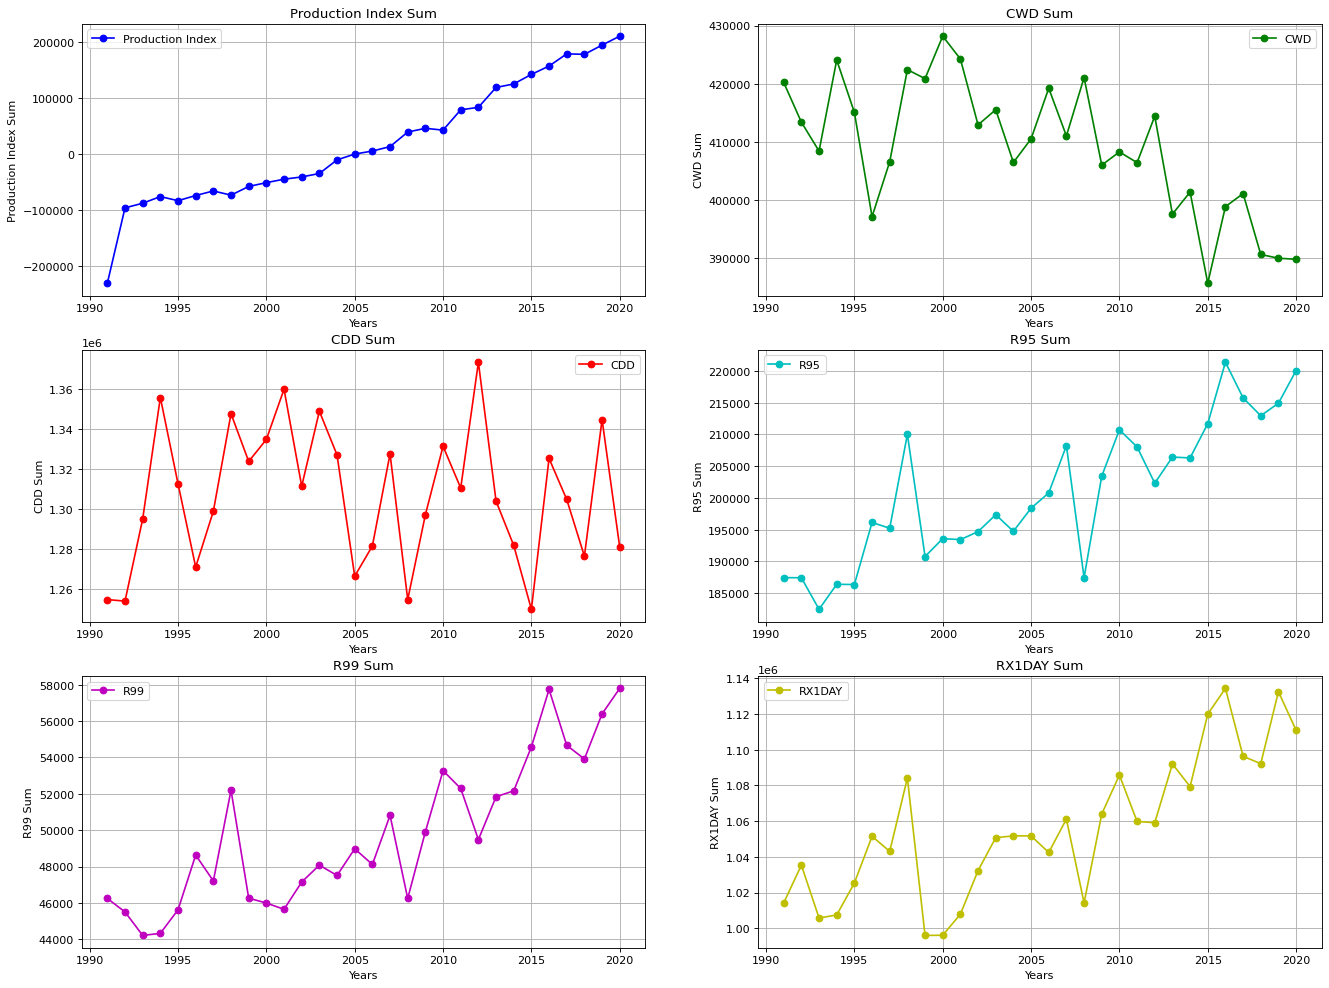

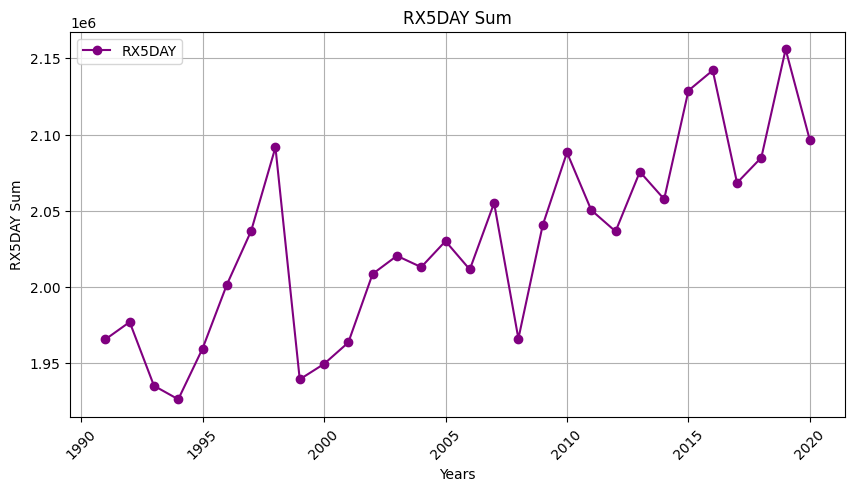

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import json
import requests
import folium
import json
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML  # Jupyter 환경에서 애니메이션을 시각화
import numpy as np
file_path_r95 = '/root/notenotenote/r95_era5_1991-2020.nc'
file_path_r99 = '/root/notenotenote/r99_era5_1991-2020.nc'
file_path_rx1day = '/root/notenotenote/rx1day_era5_1991-2020.nc'
file_path_rx5day = '/root/notenotenote/rx5day_era5_1991-2020.nc'
file_path_cwd = '/root/notenotenote/cwd_era5_1991-2020.nc'
file_path_cdd = '/root/notenotenote/cdd_era5_1991-2020.nc'
# combined_production_index 읽기
com_product_idx = 'https://github.com/swany00/2024_CML/raw/refs/heads/main/combined_production_index.json'
com_product_idx = json.loads(requests.get(com_product_idx).text)
production_index = com_product_idx['data_vars']
production_index_values = list(production_index.values())[0]['data']
production_index_values=np.array(production_index_values)

# 데이터 로드
r95 = xr.open_dataset(file_path_r95, decode_times=False)['r95'].values
r99 = xr.open_dataset(file_path_r99, decode_times=False)['r99'].values
rx1day = xr.open_dataset(file_path_rx1day, decode_times=False)['rx1day'].values
rx5day = xr.open_dataset(file_path_rx5day, decode_times=False)['rx5day'].values
cwd = xr.open_dataset(file_path_cwd, decode_times=False)['cwd'].values
cdd = xr.open_dataset(file_path_cdd, decode_times=False)['cdd'].values
# 그래프 그리기 함수
def plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day):
    """
    각 extreme rainfall 데이터를 기반으로 그래프를 그리는 함수입니다.
    """
    # x축을 1부터 30년으로 설정
    years = np.arange(1991, 2021)
    
    # 기준 값 (production_index_values[14]) 계산
    piv15 = np.nansum(production_index_values[14])

    # 각 데이터 항목의 연도별 합계 계산 후 piv15 빼기
    po = [np.nansum(rx1day[i]) for i in range(30)]
    co = [np.nansum(rx5day[i]) for i in range(30)]
    cdd_sum = [np.nansum(cdd[i]) for i in range(30)]
    cwd_sum = [np.nansum(cwd[i]) for i in range(30)]
    r95_sum = [np.nansum(r95[i]) for i in range(30)]
    r99_sum = [np.nansum(r99[i]) for i in range(30)]
    production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

    # 그래프 그리기
    plt.figure(figsize=(20, 15), dpi=80, )
    # Formatter 설정 (천 단위 구분 및 가독성 좋은 형식)
    def thousands_formatter(x, pos):
        return f'{x*1e-6:.1f}M'  # 1,000,000 단위로 표기

    # Production Index 그래프
    plt.subplot(3, 2, 6)
    plt.plot(years, co, marker='o', color='purple', label='RX5DAY')
    plt.xlabel('Years')
    plt.ylabel('RX5DAY Sum')
    plt.title('RX5DAY Sum')
    plt.grid()
    plt.legend()
    # CWD 그래프
    plt.subplot(3, 2, 1)
    plt.plot(years, cwd_sum, marker='o', color='g', label='CWD')
    plt.xlabel('Years')
    plt.ylabel('CWD Sum')
    plt.title('CWD Sum')
    plt.grid()
    plt.legend()

    # CDD 그래프
    plt.subplot(3, 2, 2)
    plt.plot(years, cdd_sum, marker='o', color='r', label='CDD')
    plt.xlabel('Years')
    plt.ylabel('CDD Sum')
    plt.title('CDD Sum')
    plt.grid()
    plt.legend()

    # R95 그래프
    plt.subplot(3, 2, 3)
    plt.plot(years, r95_sum, marker='o', color='c', label='R95')
    plt.xlabel('Years')
    plt.ylabel('R95 Sum')
    plt.title('R95 Sum')
    plt.grid()
    plt.legend()

    # R99 그래프
    plt.subplot(3, 2, 4)
    plt.plot(years, r99_sum, marker='o', color='m', label='R99')
    plt.xlabel('Years')
    plt.ylabel('R99 Sum')
    plt.title('R99 Sum')
    plt.grid()
    plt.legend()

    # RX1DAY 그래프
    plt.subplot(3, 2, 5)
    plt.plot(years, po, marker='o', color='y', label='RX1DAY')
    plt.xlabel('Years')
    plt.ylabel('RX1DAY Sum')
    plt.title('RX1DAY Sum')
    plt.grid()
    plt.legend()

    # RX5DAY 그래프
    plt.figure(figsize=(10, 5))
    plt.plot(years, production_index_sum, marker='o', color='b', label='Production Index')
    plt.xlabel('Years')
    plt.ylabel('Production Index Sum')
    plt.title('Production Index Sum')
    plt.grid()
    plt.legend()
    # 서브플롯 간 간격을 넓히기 위한 설정
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # 세로 간격을 넓힘

    # x축 레이블 회전 (겹침 방지)
    for ax in plt.gcf().get_axes():
        ax.tick_params(axis='x', rotation=45)
    plt.show()


plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day)


In [ ]:
np.nansum(production_index_values, axis=1)

(30, 192)

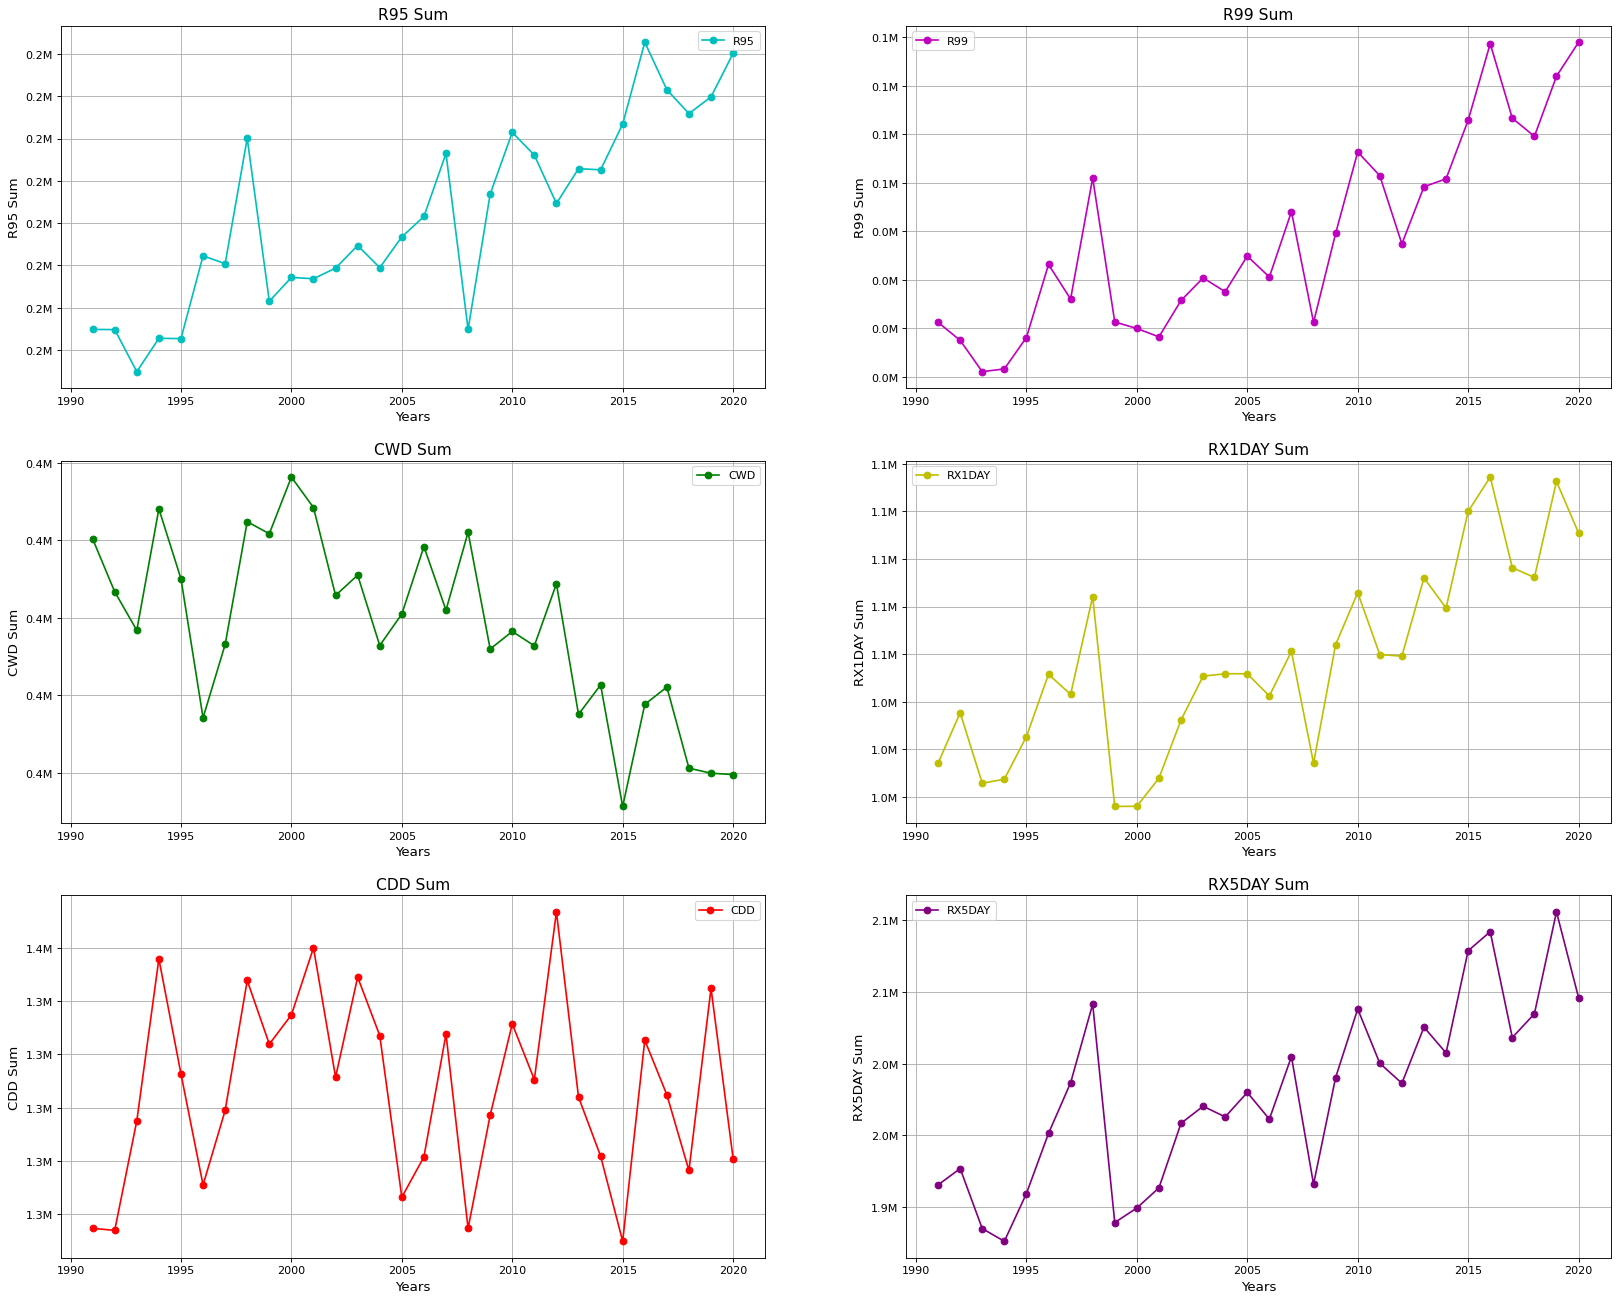

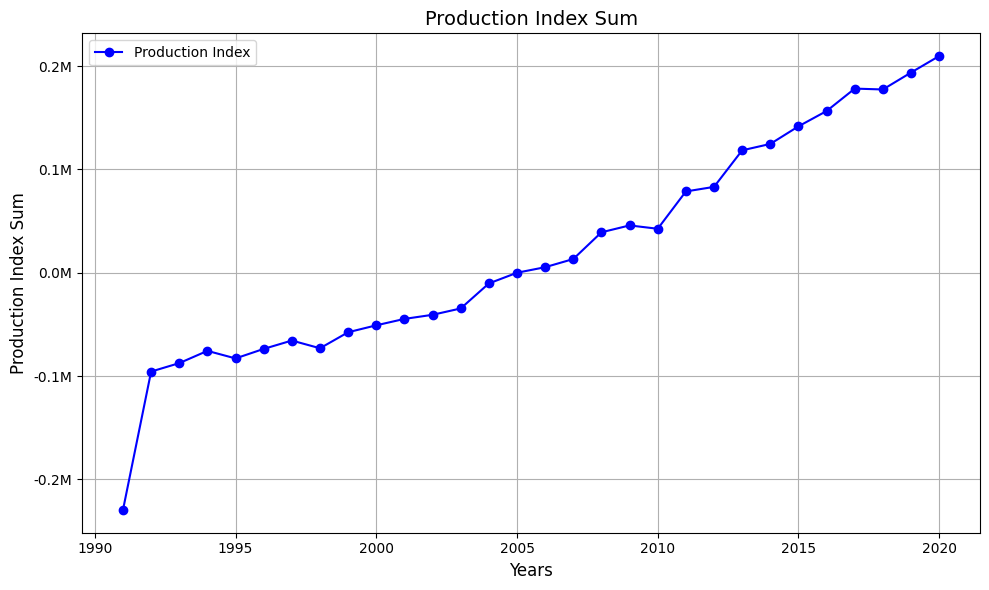

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day):
    """
    각 extreme rainfall 데이터를 기반으로 그래프를 그리는 함수입니다.
    """
    # x축을 1부터 30년으로 설정
    years = np.arange(1991, 2021)
    
    # 기준 값 (production_index_values[14]) 계산
    piv15 = np.nansum(production_index_values[14])

    # 각 데이터 항목의 연도별 합계 계산 후 piv15 빼기
    po = [np.nansum(rx1day[i]) for i in range(30)]
    co = [np.nansum(rx5day[i]) for i in range(30)]
    cdd_sum = [np.nansum(cdd[i]) for i in range(30)]
    cwd_sum = [np.nansum(cwd[i]) for i in range(30)]
    r95_sum = [np.nansum(r95[i]) for i in range(30)]
    r99_sum = [np.nansum(r99[i]) for i in range(30)]
    production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

    # 서브플롯을 키우기 위해서 figsize 설정
    fig, axs = plt.subplots(3, 2, figsize=(25, 20), dpi=80)  # 그래프 크기를 더 크게 설정

    # Formatter 설정 (천 단위 구분 및 가독성 좋은 형식)
    def thousands_formatter(x, pos):
        return f'{x*1e-6:.1f}M'  # 1,000,000 단위로 표기

    # R95 그래프
    axs[0, 0].plot(years, r95_sum, marker='o', color='c', label='R95')
    axs[0, 0].set_xlabel('Years', fontsize=12)
    axs[0, 0].set_ylabel('R95 Sum', fontsize=12)
    axs[0, 0].set_title('R95 Sum', fontsize=14)
    axs[0, 0].grid(True)
    axs[0, 0].legend()
    axs[0, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # R99 그래프
    axs[0, 1].plot(years, r99_sum, marker='o', color='m', label='R99')
    axs[0, 1].set_xlabel('Years', fontsize=12)
    axs[0, 1].set_ylabel('R99 Sum', fontsize=12)
    axs[0, 1].set_title('R99 Sum', fontsize=14)
    axs[0, 1].grid(True)
    axs[0, 1].legend()
    axs[0, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # RX1DAY 그래프
    axs[1, 1].plot(years, po, marker='o', color='y', label='RX1DAY')
    axs[1, 1].set_xlabel('Years', fontsize=12)
    axs[1, 1].set_ylabel('RX1DAY Sum', fontsize=12)
    axs[1, 1].set_title('RX1DAY Sum', fontsize=14)
    axs[1, 1].grid(True)
    axs[1, 1].legend()
    axs[1, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # RX5DAY 그래프
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    axs[2,1].plot(years, co, marker='o', color='purple', label='RX5DAY')
    axs[2,1].set_xlabel('Years', fontsize=12)
    axs[2,1].set_ylabel('RX5DAY Sum', fontsize=12)
    axs[2,1].set_title('RX5DAY Sum', fontsize=14)
    axs[2,1].grid(True)
    axs[2,1].legend()
    axs[2,1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # CWD 그래프
    axs[1, 0].plot(years, cwd_sum, marker='o', color='g', label='CWD')
    axs[1, 0].set_xlabel('Years', fontsize=12)
    axs[1, 0].set_ylabel('CWD Sum', fontsize=12)
    axs[1, 0].set_title('CWD Sum', fontsize=14)
    axs[1, 0].grid(True)
    axs[1, 0].legend()
    axs[1, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # CDD 그래프
    axs[2, 0].plot(years, cdd_sum, marker='o', color='r', label='CDD')
    axs[2, 0].set_xlabel('Years', fontsize=12)
    axs[2, 0].set_ylabel('CDD Sum', fontsize=12)
    axs[2, 0].set_title('CDD Sum', fontsize=14)
    axs[2, 0].grid(True)
    axs[2, 0].legend()
    axs[2, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # Production Index 그래프
    ax2.plot(years, production_index_sum, marker='o', color='b', label='Production Index')
    ax2.set_xlabel('Years', fontsize=12)
    ax2.set_ylabel('Production Index Sum', fontsize=12)
    ax2.set_title('Production Index Sum', fontsize=14)
    ax2.grid(True)
    ax2.legend()
    ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # 서브플롯 간 간격을 넓히기 위해서 adjust 사용
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # 서브플롯 간 간격을 넓힘

    # 그래프 렌더링
    plt.tight_layout()
    plt.show()


plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day)
